In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [44]:
from google.colab import files
uploaded = files.upload() #upon executing this cell will be prompted to choose file im uploading, upload data.csv to give me access to that file
df = pd.read_csv('data.csv') #df=dataframe, calling read_csv method lets me assemble a dataframe from the data.csv file
#df.info()
df.head(6) #display top 6 rows of dataframe

#M=malignant (cancerous)
#B=benign (non-cancerous)

Saving data.csv to data (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [45]:
df.shape # count # of rows and columns in dataframe

(569, 33)

In [46]:
#CLEANING THE DATASET
#none of the columns contain empty (NaN, NAN, na) values except for last one
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [47]:
df = df.dropna(axis=1) #drop column w/ missing values
df.shape

(569, 32)

In [48]:
df['diagnosis'].value_counts()
#357 non-cancerous, 212 cancerous

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


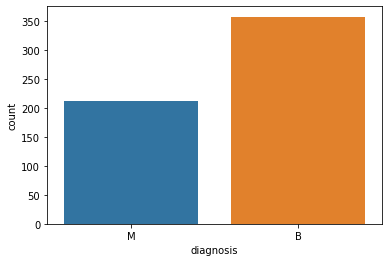

In [49]:
sns.countplot(df['diagnosis'],label="Count")


In [50]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder() #label encoder used to Encode target labels with value between 0 and n_classes-1
df.iloc[:,1]= labelencoder_y.fit_transform(df.iloc[:,1].values)
print(labelencoder_y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [52]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
#START ANALYZING WITH A MACHINE LEARNING ALGORITHM
#split dataset into a feature data set and a target dataset
X = df.iloc[:, 2:31].values #every row in columns 2 through 31, ie. radius_mean through fractal_dimension_worst, THIS IS THE FEATURE AKA INDEPENDENT DATA SET
Y = df.iloc[:, 1].values #every row in column 1, THIS IS THE TARGET AKA DEPENDENT DATA SET IE. IF DIAGNOSIS IS CANCEROUS (1) OR NOT (0)

In [54]:
from sklearn.model_selection import train_test_split
#split feature and target datasets into training and testing each
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0) #split X and Y into X_train and X_test, and Y_train and Y_test
#X_train
#X_test

In [55]:
#scale the feature data/independent data (X) to same level of magnitude
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # only use transform, not fit_transform bc this would give our model some info on the test data, and we're assuming that it doesnt have any
#X_train
#X_test

In [56]:
#TRAINING THE ACTUAL MACHINE LEARNING MODELS

#Logistic Regression 
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state = 0)
log.fit(X_train,Y_train)

#KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(X_train,Y_train)

#SVC (linear)
from sklearn.svm import SVC
svc_lin=SVC(kernel = 'linear',random_state = 0)
svc_lin.fit(X_train,Y_train)

#GaussianNB 
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)

#DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion ='entropy',random_state = 0)
tree.fit(X_train,Y_train)




DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
#print model accuracy on the training data.
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))

print('KNN Training Accuracy:', knn.score(X_train, Y_train))

print('SVM (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))

print('GNB Training Accuracy:', gauss.score(X_train, Y_train))

print('Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))

Logistic Regression Training Accuracy: 0.9906103286384976
KNN Training Accuracy: 0.9765258215962441
SVM (Linear Classifier) Training Accuracy: 0.9882629107981221
GNB Training Accuracy: 0.9507042253521126
Decision Tree Classifier Training Accuracy: 1.0


In [58]:
#get the classification accuracy & other metrics when model is used to make predictions on the test data

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('logistic regression testing performance metrics')
print(classification_report(Y_test, log.predict(X_test)))#Check precision, recall and f1-score
print('accuracy score:',accuracy_score(Y_test, log.predict(X_test)))
print('')

print('KNN testing performance metrics')
print(classification_report(Y_test, knn.predict(X_test)))
print('accuracy score:',accuracy_score(Y_test, knn.predict(X_test)))
print('')

print('SVM (Linear Classifier) testing performance metrics')
print(classification_report(Y_test, svc_lin.predict(X_test)))
print('accuracy score:',accuracy_score(Y_test, svc_lin.predict(X_test)))
print('')

print('GNB testing performance metrics')
print(classification_report(Y_test, gauss.predict(X_test)))
print('accuracy score:',accuracy_score(Y_test, gauss.predict(X_test)))
print('')


print('Decision Tree Classifier testing performance metrics')
print(classification_report(Y_test, tree.predict(X_test)))
print('accuracy score:',accuracy_score(Y_test, tree.predict(X_test)))
print('')




logistic regression testing performance metrics
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

accuracy score: 0.9440559440559441

KNN testing performance metrics
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

accuracy score: 0.958041958041958

SVM (Linear Classifier) testing performance metrics
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96 

<ipython-input-59-0cf366b99d8d>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  logax = plt.axes()


Text(0.5, 1.0, 'Logistic regression confusion matrix')

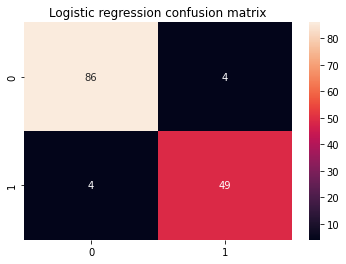

In [59]:
from sklearn.metrics import confusion_matrix

cmlog=confusion_matrix(Y_test, log.predict(X_test))
sns.heatmap(cmlog,annot=True)
logax = plt.axes()
logax.set_title('Logistic regression confusion matrix')



<ipython-input-60-34cc2349b343>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  logax = plt.axes()


Text(0.5, 1.0, 'K nearest neighbour confusion matrix')

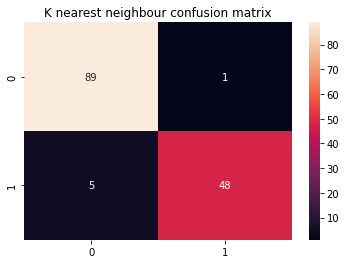

In [60]:
cmknn=confusion_matrix(Y_test, knn.predict(X_test))
sns.heatmap(cmknn,annot=True)
logax = plt.axes()
logax.set_title('K nearest neighbour confusion matrix')

<ipython-input-61-f013cb985799>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  logax = plt.axes()


Text(0.5, 1.0, 'Support vector machine confusion matrix')

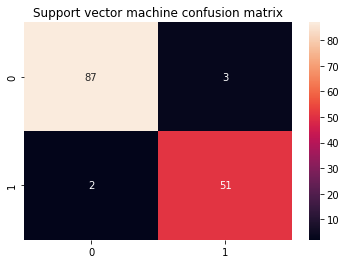

In [61]:
cmsvm = confusion_matrix(Y_test, svc_lin.predict(X_test))
sns.heatmap(cmsvm,annot=True)
logax = plt.axes()
logax.set_title('Support vector machine confusion matrix')

<ipython-input-62-8d3a77c0e4e2>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  logax = plt.axes()


Text(0.5, 1.0, 'Naive bayes confusion matrix')

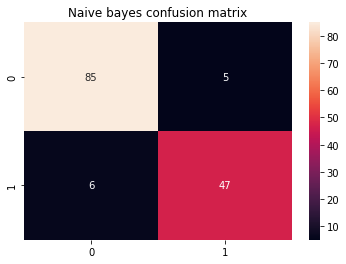

In [62]:
cmgauss = confusion_matrix(Y_test, gauss.predict(X_test))
sns.heatmap(cmgauss,annot=True)
logax = plt.axes()
logax.set_title('Naive bayes confusion matrix')

<ipython-input-63-93c0e827f9c2>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  logax = plt.axes()


Text(0.5, 1.0, 'Decision tree classifier confusion matrix')

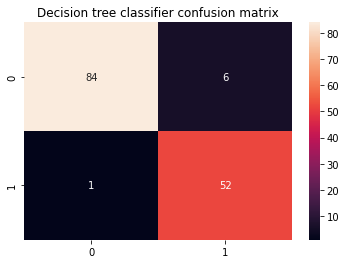

In [63]:
cmtree = confusion_matrix(Y_test, tree.predict(X_test))
sns.heatmap(cmtree,annot=True)
logax = plt.axes()
logax.set_title('Decision tree classifier confusion matrix')